For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation

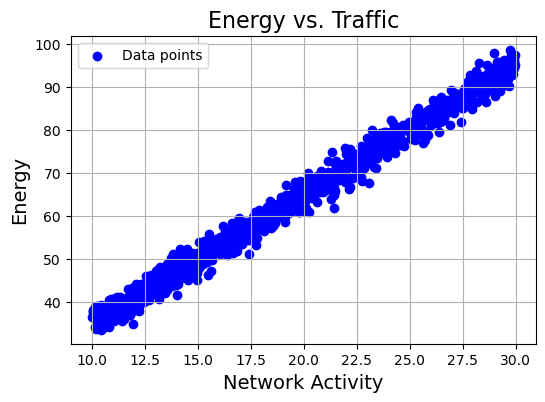

In [4]:
# Load data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

a) Visualisation of the fitted curve is provided below.
After training, model learns two things: weights $w_i$ and bias $b$ and the resulting formula for prediction is following: $\hat{y} = b + w_1*x_1 + w_2*x_2 + ... + w_n*x_n$ 

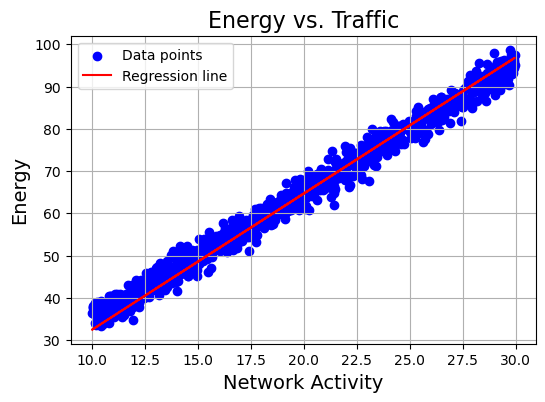

Final training R²: 0.9812028390138005
Accuracy 0.9812036939399069
Weights: [3.22726798]
Bias: 0.1561529525655887
Resulting formula: ŷ = 0.1562 + 3.2273*x1


In [5]:
# Prepare input
X = data[['Net_Activity']].values # shape (m,1), not (m,)
y = data['Energy'].values          # shape (m,)

lr = LinearRegression(epochs=20, learning_rate=0.001)
lr.fit(X,y)

# Predict
y_pred = lr.predict(X)

# Plot regression line
plt.figure(figsize=(6, 4))
plt.scatter(X, y, c='blue', label='Data points')
plt.plot(X, y_pred, c='red', label='Regression line')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()


print("Final training R²:", lr.train_accuracies[-1])
print("Accuracy", lr.accuracy(y,y_pred))
print("Weights:", lr.weights)
print("Bias:", lr.bias)
print("Resulting formula: ŷ = {:.4f} + {:.4f}*x1".format(lr.bias, lr.weights[0]))

b) analysis of prediction error distribution

Prediction error is defiened as $ e_i = y_i-\hat{y}_i$, where $y_i$ is the true value and $\hat{y}_i$ is predicted. To evaluete the the model we can plot loss (tap) and accuracy over the epochs.

An unbiased estimator is one whose expected value equals the true parameter. In other words, if we repeated sampling many times, the average of our estimates would equal the true value. For example, the sample mean is an unbiased estimator of the population mean. For the unbiased estimator the error distribution is centered around 0.

Plot below shows the prediction error distribution, and it looks normally distributed with expected value 0 and standard deviation around 4/3

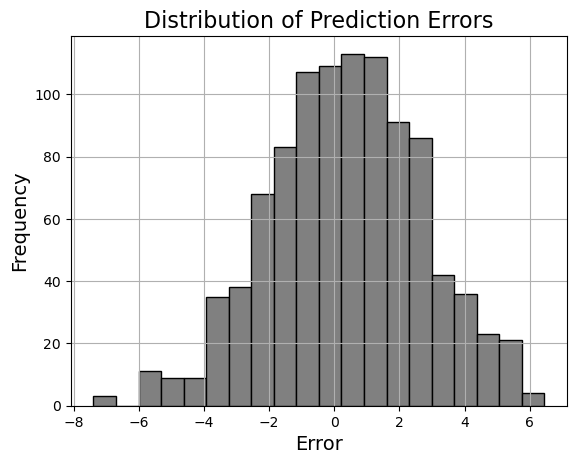

In [6]:
error = data['Energy'] - y_pred
plt.hist(error, bins=20, color='gray', edgecolor='black')
plt.title('Distribution of Prediction Errors', fontsize=16)
plt.xlabel('Error', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

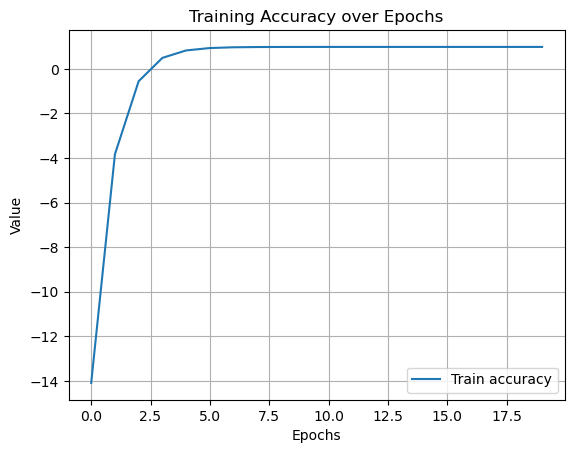

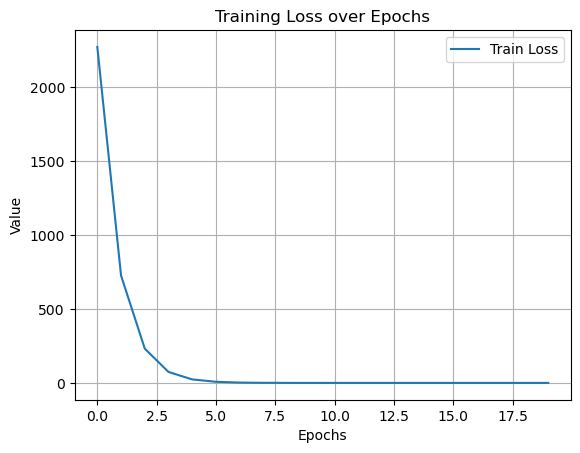

In [7]:
epoch_list = np.arange ( 0, lr.epochs, 1)
plt.plot(epoch_list, lr.train_accuracies, label='Train accuracy')

plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training Accuracy over Epochs')
plt.legend()
plt.grid()
plt.show()


plt.plot(epoch_list, lr.losses, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid()
plt.show()

## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

In [8]:
data_task2 = pd.read_csv('mission2.csv')
train = data_task2[data_task2['split'] == 'train']
test = data_task2[data_task2['split'] == 'test']
X_train= train[['x0', 'x1']]
y_train = train['y']

X_test = test[['x0', 'x1']]
y_test = test['y']


Learing rate 0.01
Pred_to_class 0.5
Final training R²: 1.0
Accuracy 1.0


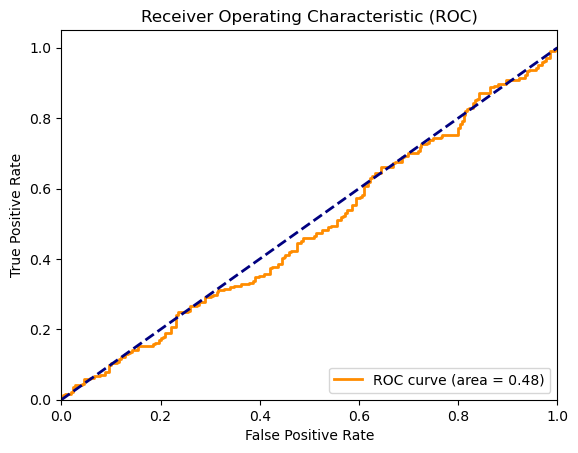

In [9]:
from logistic_regression import LogisticRegression 
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Training with initial features + ROC curve 
lor_1= LogisticRegression(learning_rate=0.01, epochs=10000, pred_to_class=0.5)
lor_1.fit(X_train,y_train)
y_pred_lor = lor_1.predict(X_test)

print("Learing rate", lor_1.learning_rate)
print("Pred_to_class", lor_1.pred_to_class)
print("Final training R²:", lor_1.train_accuracies[-1])
print("Accuracy", lor_1.accuracy(y_train,y_pred_lor))




y_scores = lor_1.predict_proba(X_test)  # probabilities for class=1

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2,
         label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")  # random baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

The accuracy is high but the predictions are random since the ROC value is below 0.5

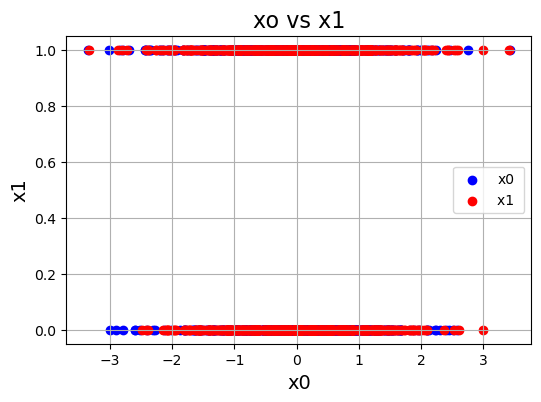

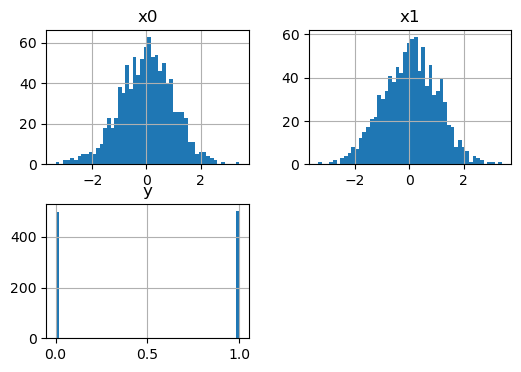

In [10]:
# First we will plot the data to see how it looks like
plt.figure(figsize=(6, 4))
plt.scatter(data_task2['x0'], data_task2['y'], c='blue', label='x0')
plt.scatter(data_task2['x1'], data_task2['y'],  c='red',label='x1 ')
plt.grid(True)
plt.xlabel('x0', fontsize=14)
plt.ylabel('x1', fontsize=14)
plt.title('xo vs x1', fontsize=16)
plt.legend()
plt.show()
data_task2.hist(bins = 50, figsize = (6,4))
plt.show()

Learing rate 1e-05
Pred_to_class 0.45
Final training R²: 0.916
Accuracy 0.916


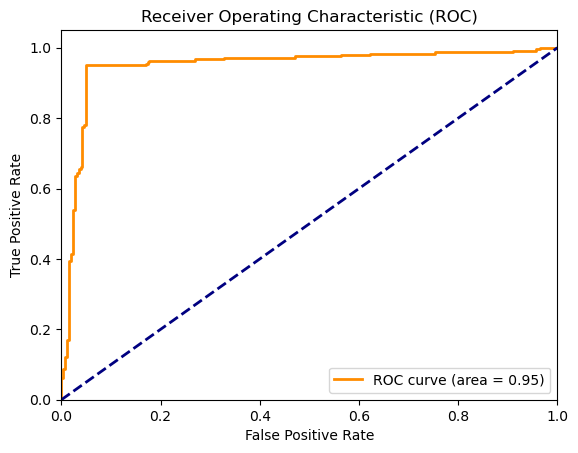

In [11]:
# Feature engineering
train_mod = train.copy()
test_mod = test.copy()
train_mod.loc[train_mod['x1'] < 0, 'x0'] = -train_mod['x0']
test_mod.loc[test_mod['x1'] < 0, 'x0'] = -test_mod['x0']

X_train = train_mod[['x0', 'x1']]
X_test = test_mod[['x0', 'x1']]

y_train = train_mod['y']
y_test = test_mod['y']

lor_2= LogisticRegression(learning_rate=0.00001, epochs=10000, pred_to_class=0.45)
lor_2.fit(X_train,y_train)
y_pred_lor = lor_2.predict(X_test)

print("Learing rate", lor_2.learning_rate)
print("Pred_to_class", lor_2.pred_to_class)
print("Final training R²:", lor_2.train_accuracies[-1])
print("Accuracy", lor_2.accuracy(y_test,y_pred_lor))


y_scores = lor_2.predict_proba(X_test)  # probabilities for class=1

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2,
         label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")  # random baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

In [12]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
# another feature engeneering approach: polynomial features + normalization
poly = PolynomialFeatures(degree=10, include_bias=False)
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train.copy())
X_test_scaled = scaler.transform(X_test.copy())


X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("Original number of features:", X_train.shape[1])
print("Number of features after polynomial expansion:", X_train_poly.shape[1])
print("Feature names after polynomial expansion:", poly.get_feature_names_out(['x0', 'x1']))


Original number of features: 2
Number of features after polynomial expansion: 65
Feature names after polynomial expansion: ['x0' 'x1' 'x0^2' 'x0 x1' 'x1^2' 'x0^3' 'x0^2 x1' 'x0 x1^2' 'x1^3' 'x0^4'
 'x0^3 x1' 'x0^2 x1^2' 'x0 x1^3' 'x1^4' 'x0^5' 'x0^4 x1' 'x0^3 x1^2'
 'x0^2 x1^3' 'x0 x1^4' 'x1^5' 'x0^6' 'x0^5 x1' 'x0^4 x1^2' 'x0^3 x1^3'
 'x0^2 x1^4' 'x0 x1^5' 'x1^6' 'x0^7' 'x0^6 x1' 'x0^5 x1^2' 'x0^4 x1^3'
 'x0^3 x1^4' 'x0^2 x1^5' 'x0 x1^6' 'x1^7' 'x0^8' 'x0^7 x1' 'x0^6 x1^2'
 'x0^5 x1^3' 'x0^4 x1^4' 'x0^3 x1^5' 'x0^2 x1^6' 'x0 x1^7' 'x1^8' 'x0^9'
 'x0^8 x1' 'x0^7 x1^2' 'x0^6 x1^3' 'x0^5 x1^4' 'x0^4 x1^5' 'x0^3 x1^6'
 'x0^2 x1^7' 'x0 x1^8' 'x1^9' 'x0^10' 'x0^9 x1' 'x0^8 x1^2' 'x0^7 x1^3'
 'x0^6 x1^4' 'x0^5 x1^5' 'x0^4 x1^6' 'x0^3 x1^7' 'x0^2 x1^8' 'x0 x1^9'
 'x1^10']


Final training R²: 0.96
Accuracy 0.868


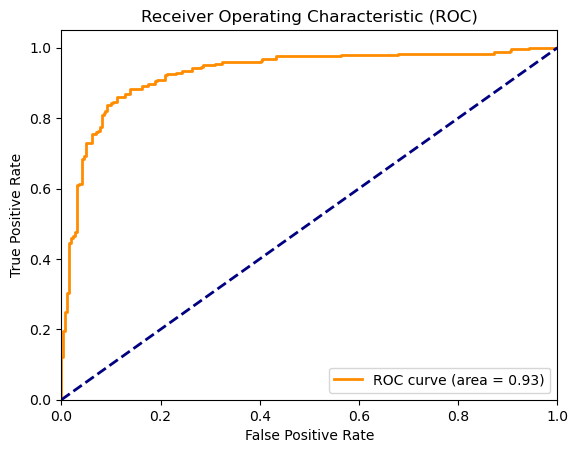

In [13]:
lor_3= LogisticRegression(learning_rate=0.0001, epochs=10000, pred_to_class=0.5)
lor_3.fit(X_train_poly,y_train)
y_pred_lor = lor_3.predict(X_test_poly)

print("Final training R²:", lor_3.train_accuracies[-1])
print("Accuracy", lor_3.accuracy(y_test,y_pred_lor))

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_test : true binary labels (0/1)
# y_scores: predicted probabilities for the positive class
y_scores = lor_3.predict_proba(X_test_poly)  # probabilities for class=1

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2,
         label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")  # random baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

This is the best i could manage to get from the polynomial features, by changing the learning rate and epochs.
The second model lor_2 shows the best overall performace both in accuracy and ROC curve. 

In [14]:
# corr_matrix = train.corr()['y']
# print(corr_matrix)

 **Discussion**:

a. Explain poor initial performance and your improvements

   Bad performance to begin with can be explained due to the feature/s not representing the binary 0/1, with manes it difficult to train a model. 
   

b. What is the model's inductive bias. Why is it important?
   
   Inductive bias is a model’s built-in assumptions about what kinds of patterns are most plausible in data.

   Examples:
   Logistic regression: assumes a linear decision boundary in the input features (after any preprocessing you do).
   Decision trees: favor axis-aligned rules (“if feature j ≤ t then…”) and piecewise-constant regions.

   It is important for the model to have inductive bias to steers learning toward some function more then the others. If bias matches real structure, the model will be easier to teach with less data.

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(random_state=0) 
tree.fit(X_train_poly, y_train)
y_pred_tree = tree.predict(X_test_poly)
print("Decision Tree accuracy:", accuracy_score(y_test, y_pred_tree))


Decision Tree accuracy: 0.902


## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

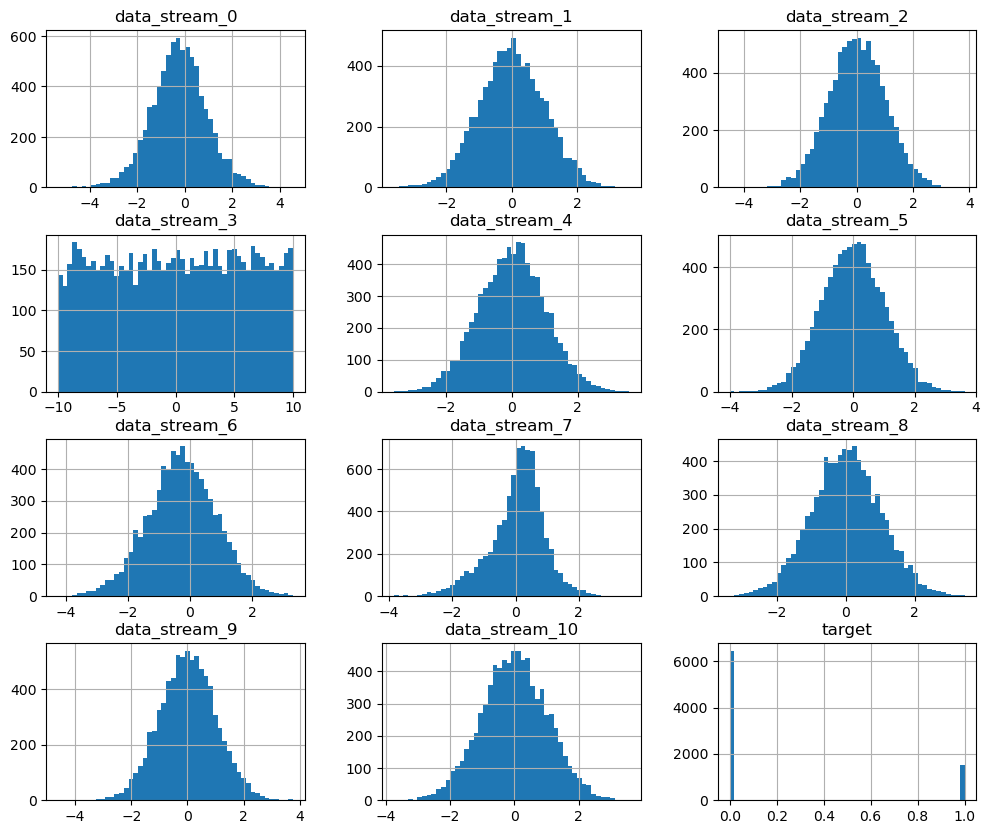

-9.999 0
9.996 0


In [16]:
train_3 = pd.read_csv('mission3_train.csv')
test_3 = pd.read_csv('mission3_test.csv')

train_3.hist(bins = 50, figsize = (12,10))
plt.show()

print(train_3['data_stream_3'].min(), train_3['target'][train_3['data_stream_3'].idxmin()])
print(train_3['data_stream_3'].max(),train_3['target'][train_3['data_stream_3'].idxmax()])


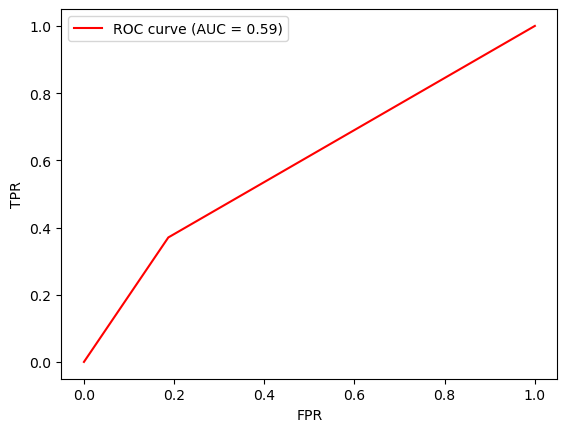

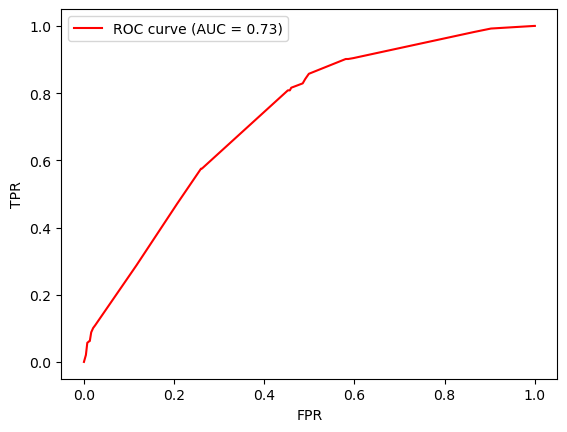

In [17]:
X_train = train_3.drop("target", axis=1)
y_train = train_3["target"]

X_test = test_3.drop("target", axis=1)
y_test = test_3["target"]
# decripting the feature 'data_stream_3'
X_train["data_stream_3"] = (X_train["data_stream_3"]*1000).astype(int)%2
X_test["data_stream_3"] = (X_test["data_stream_3"]*1000).astype(int)%2

clf = DecisionTreeClassifier() # without changing hyperparameters
clf.fit(X_train, y_train)

### ROC curve plot
y_prob = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color="red", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

clf_2 = DecisionTreeClassifier(random_state=42,
                              max_depth=5, 
                              min_samples_leaf=4, 
                              min_samples_split=2) 
clf_2.fit(X_train, y_train)

### ROC curve plot
y_prob = clf_2.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color="red", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()



## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   -- See how the datta looks like, determine if it needs to be changes, and change it. 
   In this case the data in the test has to be reordered and NaN values removed.

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   -- Root Mean Squarded Logarithmic Error is a common metric for regresion problems. It is often used when predictions have a large deviation, such in the case of power predictions 

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 
   
   -- In the real word scenario we can split the training data and use one part of it for testing. To be even more sure we can split it into trainin gtesting and validation datasets.

---

In [18]:
train_4= pd.read_csv('final_mission_train.csv')
test_4 = pd.read_csv('final_mission_test.csv')

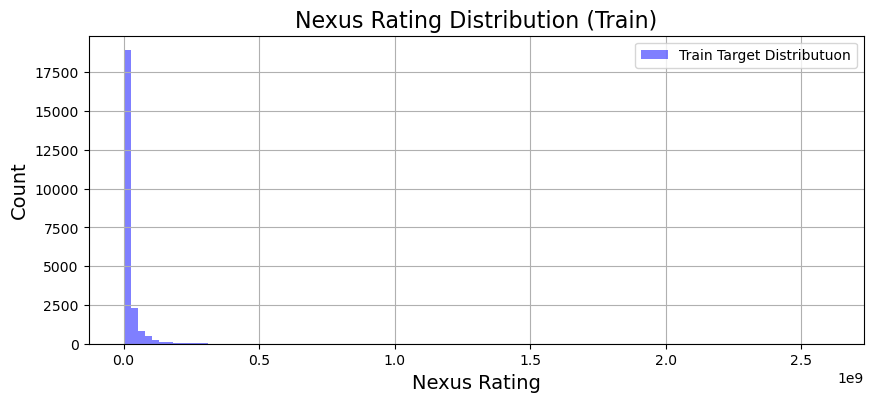

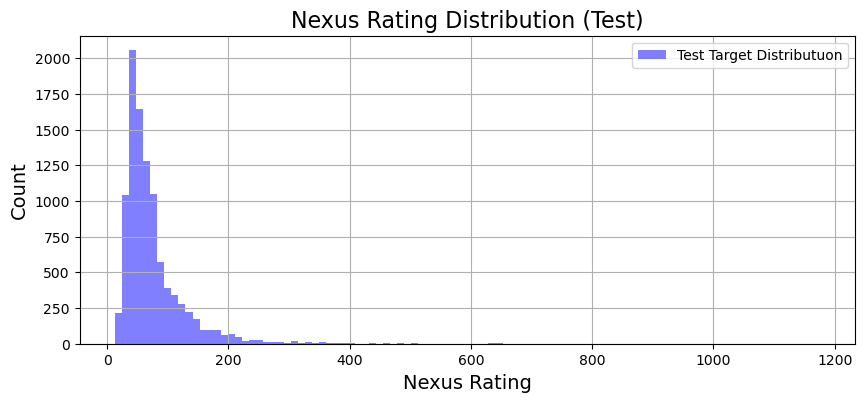

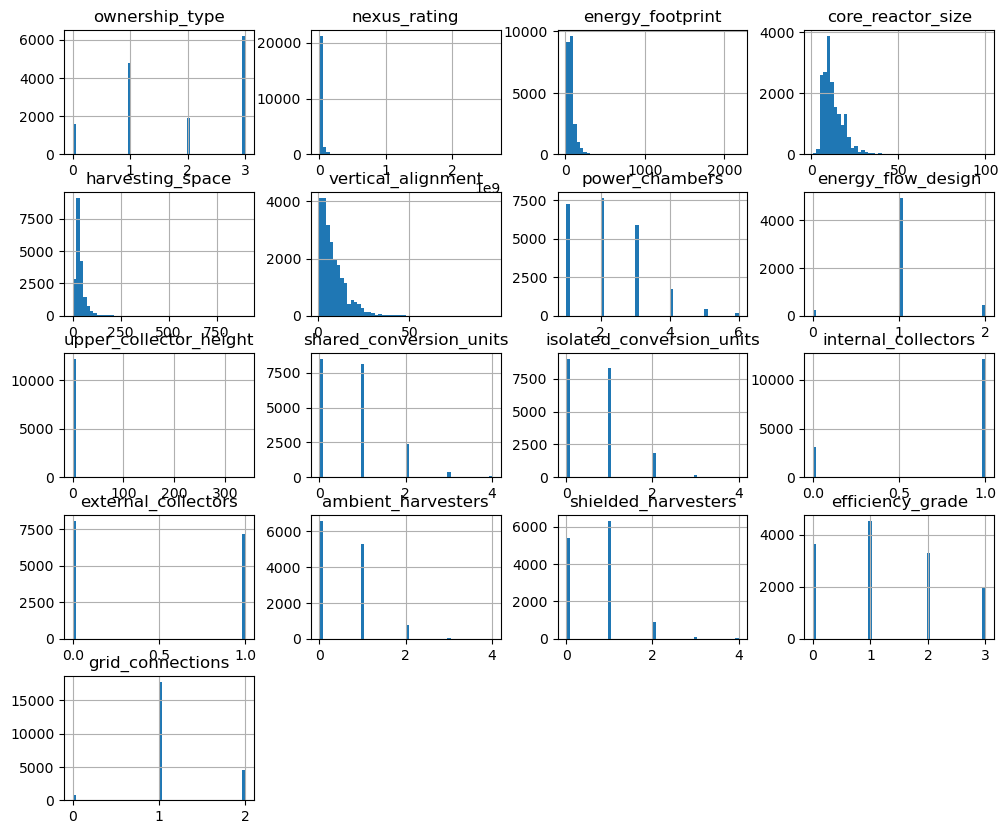

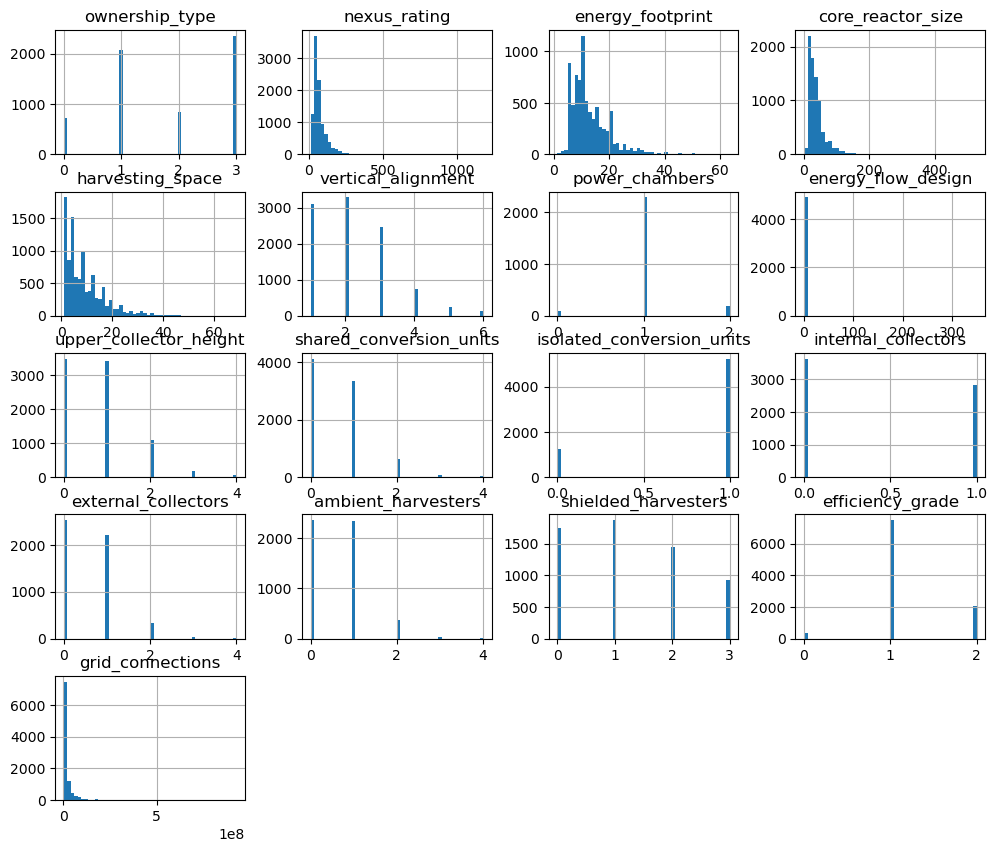

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train_4['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.legend()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
test_4['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Test Target Distributuon')
ax.set_title('Nexus Rating Distribution (Test)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.legend()
plt.show()

train_4.hist(bins = 50, figsize = (12,10))
plt.show()
test_4.hist(bins = 50, figsize = (12,10))
plt.show()


We can see that the test data has been tempered with and changes one featur to the left.

In [20]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [21]:
# # Example rmsle check
# test_4['pred'] = 0
# print('RMSLE: ', rmsle(test_4['nexus_rating'], test_4['pred']))
# print('Required RMSLE: ', 0.294)

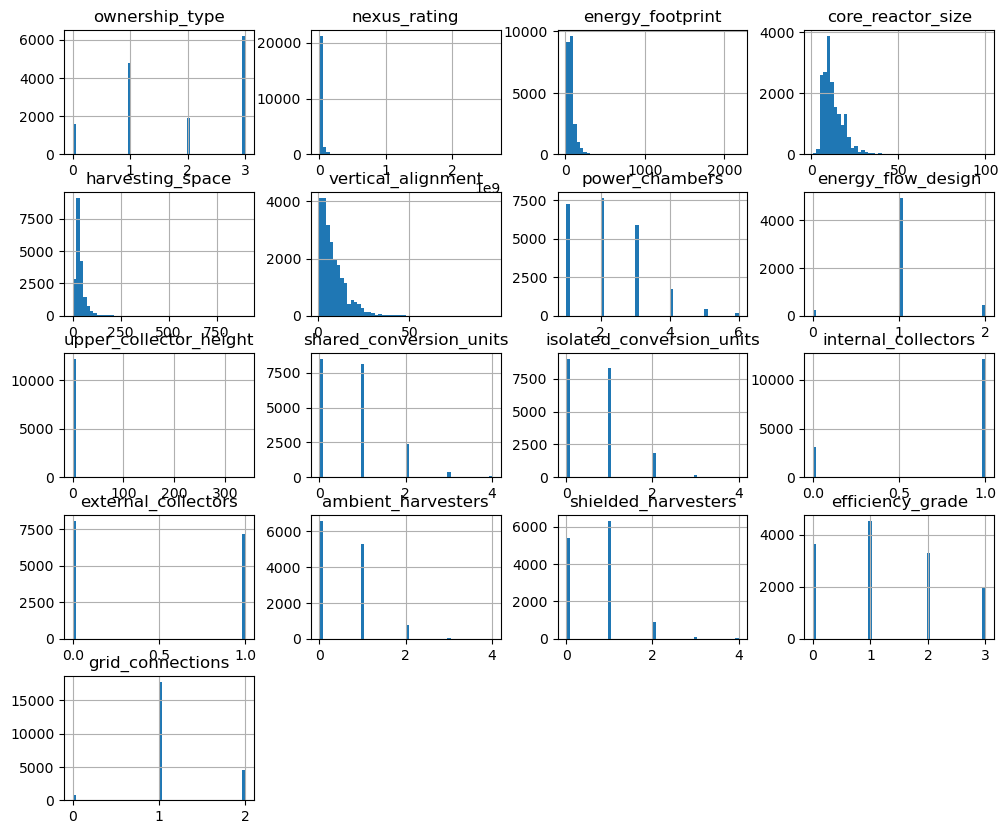

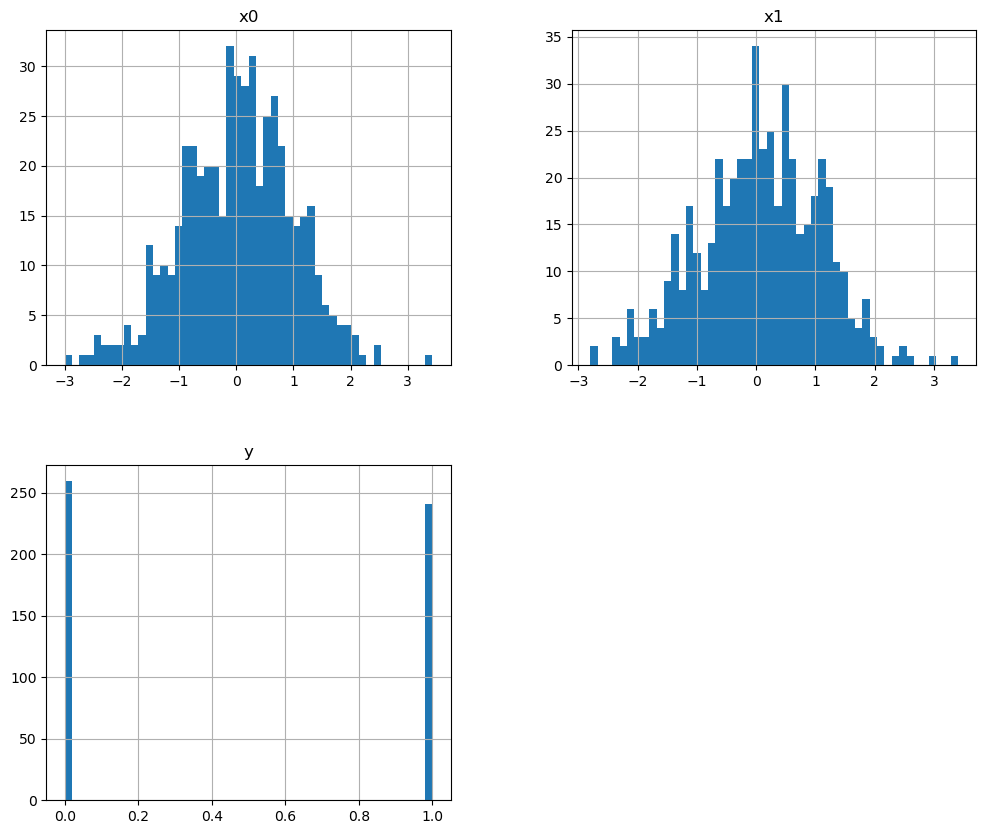

In [22]:
nexusRating = test_4['grid_connections']
ownershipType = test_4['ownership_type']

# Shift all columns one index to the right
test_4 = test_4.shift(1, axis=1)

# Fill the first column with the ownership type
test_4.iloc[:, 0] = ownershipType

# Fill the second column with nexus_rating
test_4.iloc[:, 1] = nexusRating

train_4.hist(bins = 50, figsize = (12,10))
plt.show()
test.hist(bins = 50, figsize = (12,10))
plt.show()

In [23]:
corr_matrix = train_4.corr()['nexus_rating']
print(corr_matrix)

ownership_type               0.101015
nexus_rating                 1.000000
energy_footprint             0.814829
core_reactor_size            0.364758
harvesting_space             0.707580
vertical_alignment           0.132206
power_chambers               0.411317
energy_flow_design           0.130822
upper_collector_height       0.031640
shared_conversion_units      0.332421
isolated_conversion_units    0.133364
internal_collectors         -0.005345
external_collectors          0.180263
ambient_harvesters           0.102928
shielded_harvesters          0.024877
efficiency_grade             0.109338
grid_connections             0.042738
Name: nexus_rating, dtype: float64


In [24]:
train_tempo = train_4.copy()
test_tempo = test_4.copy()

X_train = train_tempo.drop('nexus_rating', axis=1)
X_test = test_tempo.drop('nexus_rating', axis=1)


y_train = train_tempo['nexus_rating']
y_test = test_tempo['nexus_rating']
y_train = np.log1p(y_train)


In [25]:
from catboost import CatBoostRegressor

# Only CatBoostRegressor
cbr2 = CatBoostRegressor(iterations=1000, learning_rate=0.055, depth=10, random_seed=46, loss_function='RMSE')
cbr2.fit(X_train, y_train)
cbr2_pred = cbr2.predict(X_test)
cbr2_pred = np.expm1(cbr2_pred)

#pred = rfr.predict(test_filled.drop('nexus_rating', axis=1))
print('RMSLE: ', rmsle(y_test, cbr2_pred))
print('Required RMSLE: ', 0.294)


0:	learn: 0.8280832	total: 79.5ms	remaining: 1m 19s
1:	learn: 0.7950232	total: 93.5ms	remaining: 46.6s
2:	learn: 0.7639720	total: 103ms	remaining: 34.3s
3:	learn: 0.7345447	total: 112ms	remaining: 27.8s
4:	learn: 0.7067841	total: 119ms	remaining: 23.8s
5:	learn: 0.6808431	total: 128ms	remaining: 21.1s
6:	learn: 0.6570131	total: 135ms	remaining: 19.1s
7:	learn: 0.6346641	total: 142ms	remaining: 17.6s
8:	learn: 0.6124225	total: 149ms	remaining: 16.4s
9:	learn: 0.5920349	total: 157ms	remaining: 15.5s
10:	learn: 0.5732349	total: 164ms	remaining: 14.7s
11:	learn: 0.5556085	total: 171ms	remaining: 14.1s
12:	learn: 0.5400361	total: 178ms	remaining: 13.5s
13:	learn: 0.5249039	total: 186ms	remaining: 13.1s
14:	learn: 0.5104295	total: 234ms	remaining: 15.4s
15:	learn: 0.4966595	total: 251ms	remaining: 15.4s
16:	learn: 0.4840189	total: 258ms	remaining: 14.9s
17:	learn: 0.4717522	total: 266ms	remaining: 14.5s
18:	learn: 0.4607112	total: 272ms	remaining: 14s
19:	learn: 0.4508079	total: 280ms	remain

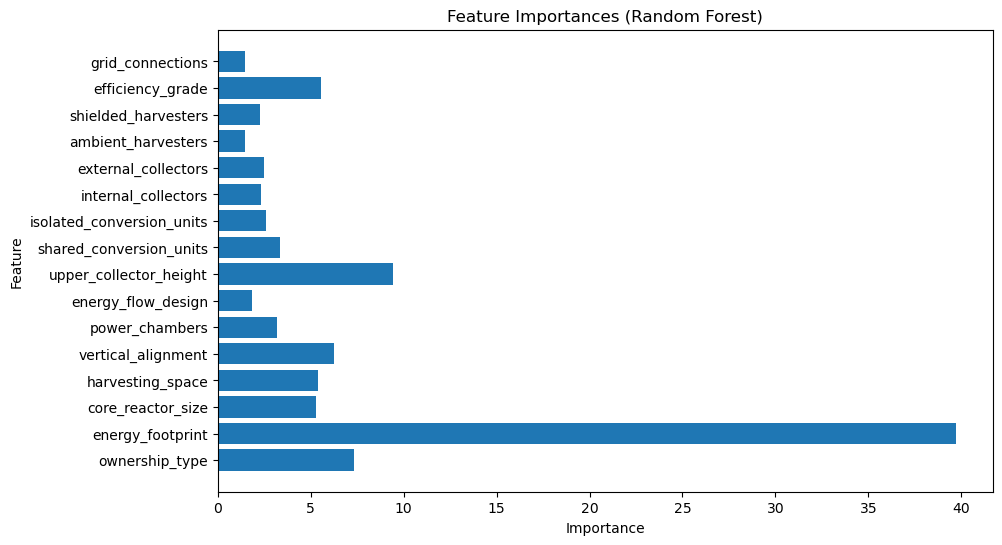

In [26]:
feature_importances = cbr2.feature_importances_
features = train_tempo.drop(columns=['nexus_rating']).columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Random Forest)')
plt.show()

Feature importance shows with of the features are wighted the most when predictions are made. In this case it is the energy_footprint and upper collector_height.

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_log_error


imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(train_4.drop(columns=['nexus_rating']))
X_test = imputer.fit_transform(test_4.drop(columns=['nexus_rating']))



In [28]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=10, random_state=46)
rfr = RandomForestRegressor(n_estimators=1000, max_depth=10, random_state=46)

gbr.fit(X_train, y_train)
rfr.fit(X_train, y_train)

gbr_pred = gbr.predict(X_test)
rfr_pred = rfr.predict(X_test)

gbr_pred = np.expm1(gbr_pred)
rfr_pred = np.expm1(rfr_pred)

print('RMSLE GBR: ', rmsle(y_test, gbr_pred))
print('RMSLE RFR: ', rmsle(y_test, rfr_pred))

# we can combine predictions of different models to improve the final result


RMSLE GBR:  0.3882747913328694
RMSLE RFR:  0.33309613988389347
